## MidTerm 
Titanic Dataset Modeling 
- Author: Shelar Rohit
- Date: 14/03/2021

In [78]:
# ! pip install boruta
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from boruta import BorutaPy 

In [79]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv('titanic_test.csv')

In [80]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
len(titanic_train)

891

In [83]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
print('Percentage division of Survived Categories')
titanic_train['Survived'].value_counts(normalize=True) * 100

Percentage division of Survived Categories


0    61.616162
1    38.383838
Name: Survived, dtype: float64

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       549
           1       0.00      0.00      0.00       342

    accuracy                           0.62       891
   macro avg       0.31      0.50      0.38       891
weighted avg       0.38      0.62      0.47       891

-------------------------- Confusion matrix --------------------------



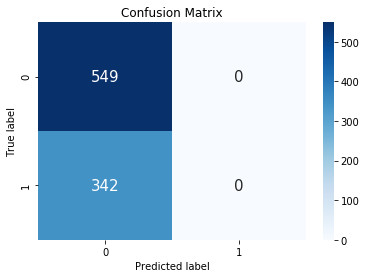

In [85]:
titanic_train_null = [0 for i in range(len(titanic_train['Survived']))]
_y_pred_null= titanic_train_null
_y_test_null= titanic_train['Survived'].to_list()

print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(_y_test_null, _y_pred_null))

cf_matrix = confusion_matrix(_y_test_null,_y_pred_null)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
print('-------------------------- Confusion matrix --------------------------\n')

In [86]:
# Cabin column can be droped as about 77% of data is missing in it.
titanic_train = titanic_train.drop(columns='Cabin')

In [87]:
women = titanic_train.loc[titanic_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [88]:
women = titanic_train.loc[titanic_train.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)
print("% of men who survived:", rate_women)

% of men who survived: 0.18890814558058924


In [89]:
titanic_train = titanic_train.drop(columns=['PassengerId','Name'])

In [90]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [91]:
import random
mean = titanic_train.Age.mean()
std = titanic_train.Age.std()

list_val = []
for val in titanic_train.Age:
    if str(val) == 'nan':
        val = random.randint(int(mean-std), int(mean+std))
        list_val.append(val)
    else:
        list_val.append(val)
titanic_train.Age = list_val

In [92]:
pd.value_counts(titanic_train.Embarked).to_frame().reset_index()

,index,Embarked
0,S,644
1,C,168
2,Q,77


In [93]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

In [94]:
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [95]:
titanic_train = titanic_train.drop(columns='Ticket')
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
cat_cols = ['Sex','Embarked']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    titanic_train[col] = le.fit_transform(titanic_train[col])

In [97]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = titanic_train.drop(columns='Survived') #independent columns
y = titanic_train['Survived']

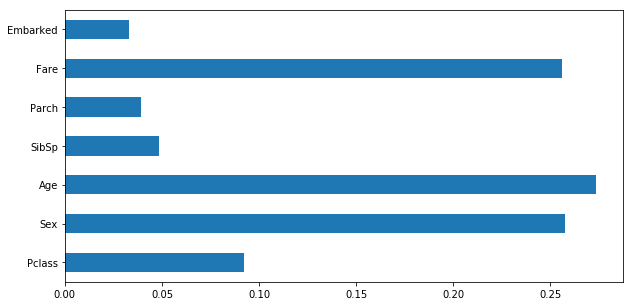

In [98]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh',figsize=(10,5)) #.nlargest(60)
plt.show()

In [99]:
# Split Data into train and test dataset 
from sklearn.model_selection import train_test_split
X =  titanic_train.drop(columns=['Survived'])
#X = X.values
y = titanic_train['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy

In [101]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=150, criterion="gini",bootstrap=True, random_state=42)
RFclf = RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test) 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       134
           1       0.76      0.74      0.75        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

-------------------------- Confusion matrix --------------------------



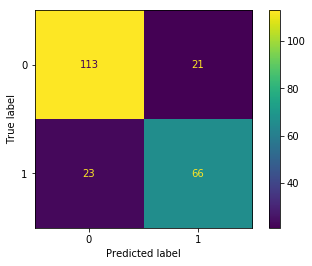

In [102]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFclf, X_test, y_test)  

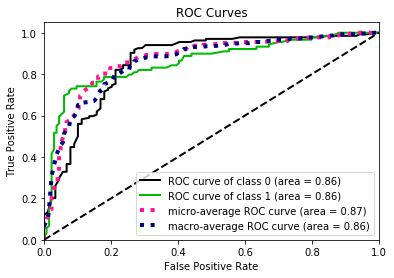

In [103]:
y_pred_proba = RFclf.predict_proba(X_test)
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logistic = LogisticRegression()

In [105]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Accuracy Score: ", logistic.score(X_test, y_test))

Accuracy Score:  0.8026905829596412


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.76      0.73      0.75        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

-------------------------- Confusion matrix --------------------------



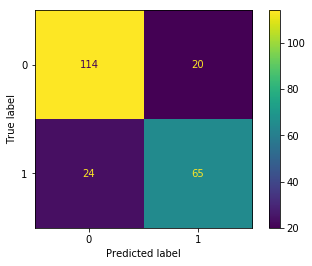

In [106]:
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, X_test, y_test)  

In [107]:
y_pred_proba = logistic.predict_proba(X_test)

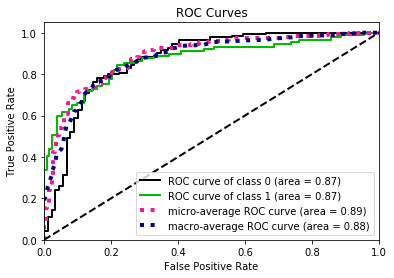

In [108]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [109]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [110]:
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)
y_pred = XGmodel.predict(X_test)

In [111]:
y_pred_proba = XGmodel.predict_proba(X_test)

In [112]:
print("Accuracy Score: ", XGmodel.score(X_test, y_test))

Accuracy Score:  0.8161434977578476


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       134
           1       0.81      0.71      0.75        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223

-------------------------- Confusion matrix --------------------------



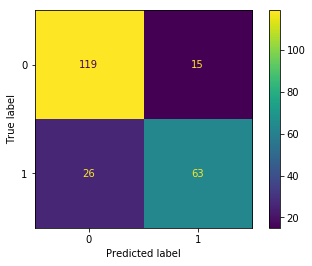

In [113]:
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(XGmodel, X_test, y_test)  

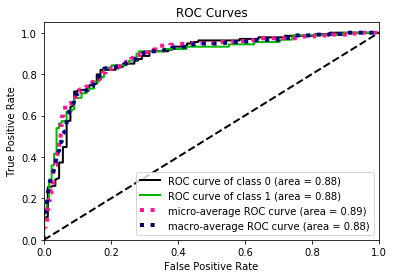

In [114]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [115]:
# XGBoost with cross validation 
from sklearn.model_selection import cross_val_score
rf = XGBClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8358209  0.73134328 0.86567164 0.89552239 0.80597015 0.76119403
 0.8358209  0.7761194  0.75757576 0.92424242]
Mean: 0.8189280868385346
Standard Deviation: 0.06040067011702831


In [116]:
# KNN ti check accuracy
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score: ',knn.score(X_test, y_test))

Accuracy Score:  0.7085201793721974


In [119]:
XGmodel = XGBClassifier()
XGmodel.fit(X, y)
print("Training Accuracy Score: ", XGmodel.score(X, y))

Training Accuracy Score:  0.8810325476992144


In [120]:
# Preprocessing the test adatset same as training dataset

In [121]:

titanic_test = titanic_test.drop(columns=['PassengerId','Name','Cabin'])

In [122]:
import random
mean = titanic_test.Age.mean()
std = titanic_test.Age.std()

list_val = []
for val in titanic_test.Age:
    if str(val) == 'nan':
        val = random.randint(int(mean-std), int(mean+std))
        list_val.append(val)
    else:
        list_val.append(val)
titanic_test.Age = list_val

In [123]:
titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')
titanic_test = titanic_test.drop(columns='Ticket')

In [124]:
titanic_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [125]:
titanic_test.Fare = titanic_test.Fare.fillna(titanic_test.Fare.mean())

In [126]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [127]:
cat_cols = ['Sex','Embarked']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    titanic_test[col] = le.fit_transform(titanic_test[col])

In [128]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [129]:
y_pred = XGmodel.predict(titanic_test)

In [130]:
titanic_test['Predicted Survived'] = y_pred

In [131]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,0


In [132]:
titanic_test.to_csv('Titanic_Survived_Result.csv', index = False)

In [133]:
# Prediction is saved in Titanic_Survived_Result.csv

#### Thank You